In [ ]:
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Conv2D, Flatten, MaxPooling2D, Activation, RandomFlip, RandomRotation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf

In [3]:
tf.__version__

'2.7.0'

In [5]:
pickle_in = open("X_train.pickle", "rb")
X = pickle.load(pickle_in)
X = X

pickle_in = open("Y_train.pickle", "rb")
y = pickle.load(pickle_in)

In [6]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [7]:
INPUT_SHAPE = X[0].shape

In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = INPUT_SHAPE, activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))

model.add(Dense(21, activation = "softmax"))

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8

In [46]:
#history = model2.fit(X, y, batch_size=64, epochs=15, validation_split = 0.2)
#model2.save("data_augmentation_model.model")

In [10]:
history = model.fit(X, y, batch_size=64, epochs=15, validation_split = 0.2)
model.save("first_model.model")

Epoch 1/15
521/521 [==============================] - 37s 54ms/step - loss: 10.5692 - accuracy: 0.7523 - val_loss: 0.5717 - val_accuracy: 0.8519
Epoch 2/15
521/521 [==============================] - 28s 54ms/step - loss: 0.5682 - accuracy: 0.8510 - val_loss: 0.4669 - val_accuracy: 0.8763
Epoch 3/15
521/521 [==============================] - 28s 54ms/step - loss: 0.4206 - accuracy: 0.8895 - val_loss: 0.3831 - val_accuracy: 0.9042
Epoch 4/15
521/521 [==============================] - 28s 54ms/step - loss: 0.3254 - accuracy: 0.9157 - val_loss: 0.4200 - val_accuracy: 0.8907
Epoch 5/15
521/521 [==============================] - 28s 54ms/step - loss: 0.3092 - accuracy: 0.9204 - val_loss: 0.2676 - val_accuracy: 0.9367
Epoch 6/15
521/521 [==============================] - 28s 55ms/step - loss: 0.2143 - accuracy: 0.9446 - val_loss: 0.3499 - val_accuracy: 0.9125
Epoch 7/15
521/521 [==============================] - 28s 54ms/step - loss: 0.1756 - accuracy: 0.9538 - val_loss: 0.1537 - val_accuracy

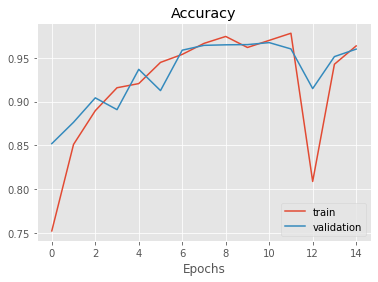

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.show()

In [12]:
first_model = tf.keras.models.load_model("first_model.model")

In [3]:
pickle_in = open("X_test.pickle", "rb")
X = pickle.load(pickle_in)
X = X

pickle_in = open("Y_test.pickle", "rb")
y = pickle.load(pickle_in)

In [13]:
first_model.evaluate(X, y)

1302/1302 [==============================] - 21s 16ms/step - loss: 0.1031 - accuracy: 0.9691


[0.1031450629234314, 0.9691365361213684]

In [ ]:
# callback tensorboard - foi
# train, test, validation - foi
# data augmentation - foi

# Próximos passos: webcam + model